In [1]:
import numpy as np
from numpy.random import rand, seed
from numpy.linalg import norm, pinv
from scipy.optimize import minimize, fmin
# https://www.cvxpy.org/
import cvxpy as cp

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

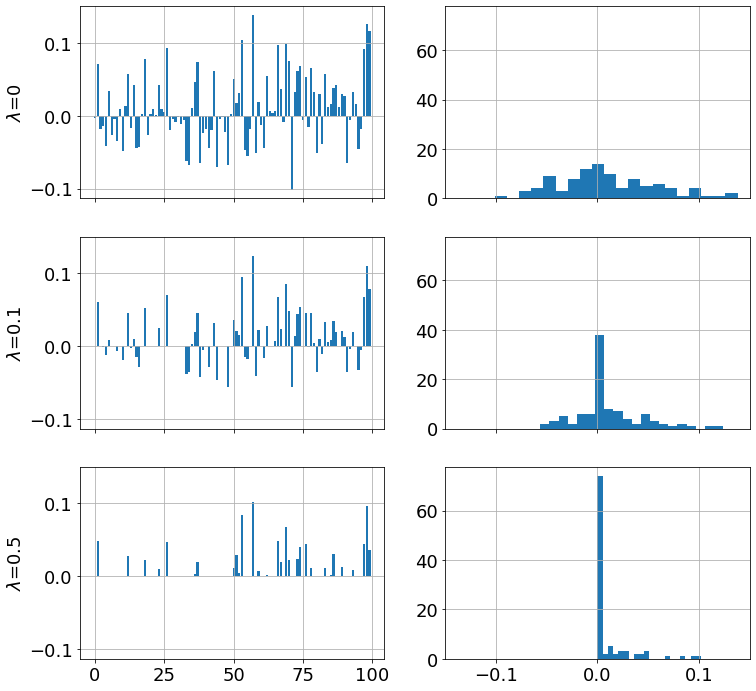

In [2]:
# Figure 4.9
seed(31415)

# Overdetermined system
n, m = 500, 100
A = rand(n, m)
b = rand(n)

λs = [0, 0.1, 0.5]
xs = []
for λ in λs:
    x = cp.Variable(m)
    cp.Problem(
        cp.Minimize(cp.norm2(A@x - b) + λ*cp.norm1(x)),
        ).solve()
    xs += [x.value]


fig, axs = plt.subplots(len(λs), 2, sharex='col', sharey='col', figsize=(12, 12))
for ax_left, ax_right, λ, x in zip(axs[:, 0], axs[:, 1], λs, xs):
    ax_left.bar(range(m), x)
    ax_left.set_ylabel(f'$\\lambda$={λ}')
    ax_left.grid(True)
    ax_right.hist(x, 20)
    ax_right.set_xlim(-0.15, 0.15)
    ax_right.grid(True)

/Users/ron/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1060: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


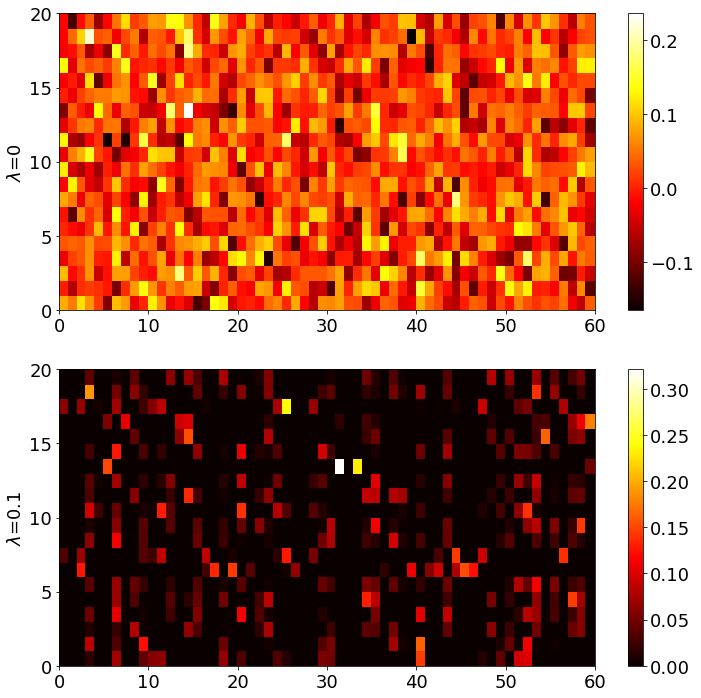

In [3]:
# Figure 4.10
seed(31415)

# Overdetermined System
n, m = 300, 60
p = 20
A = rand(n, m)
b = rand(n, p)

λs = [0, 0.1]
xs = []
for λ in λs:
    x = cp.Variable((m, p))
    cp.Problem(
        cp.Minimize(cp.norm2(A@x - b) + λ*cp.norm1(x))
    ).solve(max_iters=10000) # seems to use 'SCS' solver
    xs += [x.value]

    
fig, axs = plt.subplots(len(λs), 1, figsize=(12, 12))
for ax, λ, x in zip(axs, λs, xs):
    x_pcolor = ax.pcolor(x.T, cmap='hot')
    fig.colorbar(x_pcolor, ax=ax)
    ax.set_ylabel(f'$\\lambda$={λ}')
    ax.set_yticks(np.arange(0, x.shape[1]+1, 5))

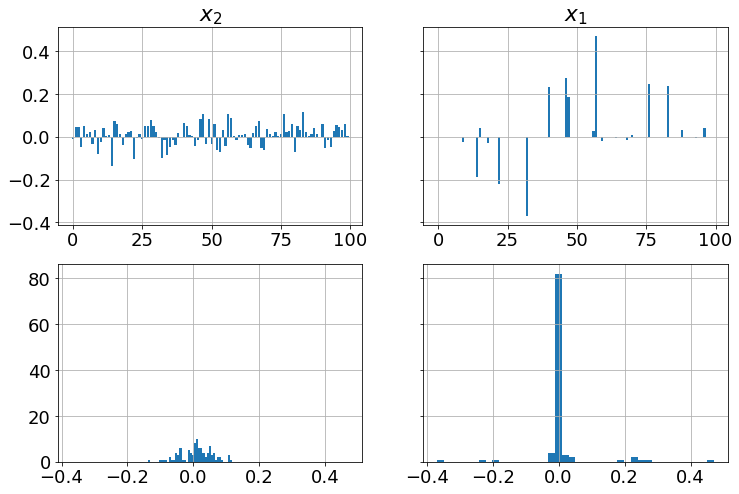

In [4]:
# Figure 4.12
seed(31415)

# Underdetermined system
n, m = 20, 100
A = rand(n, m)
b = rand(n)

x = cp.Variable(m)
cp.Problem(
    cp.Minimize(cp.norm1(x)),
    [A @ x == b]
    ).solve()
x1 = x.value

x = cp.Variable(m)
cp.Problem(
    cp.Minimize(cp.norm2(x)),
    [A @ x == b]
    ).solve()
x2 = x.value


fig, axs = plt.subplots(2, 2, sharey='row', sharex='row', figsize=(12, 8))
axs = axs.flat

axs[0].bar(range(m), x2)
axs[0].set_title('$x_2$')
axs[0].grid(True)

axs[1].bar(range(m), x1)
axs[1].set_title('$x_1$')
axs[1].grid(True)

axs[2].hist(x2, 40)
axs[2].grid(True)

axs[3].hist(x1, 40)
axs[3].grid(True);